# AutoKeras AutoCV para Classificação de Imagens - Experimento

Este componente utiliza [AutoKeras](https://autokeras.com/) AutoCV para a **tarefa de classificação**.

O algoritmo faz a busca por arquiteturas e hyperparâmetros que melhor configuram o modelo
para a base de dados fornecida.

### **Em caso de dúvidas, consulte os [tutoriais da PlatIAgro](https://platiagro.github.io/tutorials/).**

## Declaração de parâmetros e hiperparâmetros

Declare parâmetros com o botão  na barra de ferramentas.<br>
A variável `dataset` possui o caminho para leitura do arquivos importados na tarefa de "Upload de dados".<br>
Você também pode importar arquivos com o botão  na barra de ferramentas.

Para esse componente, a base de dados deve estar no seguinte formado:
- Arquivo CSV chamado dataset.csv contendo as colunas "image_path", "target" e "subset", onde:
    - image_path: caminho para o arquivo de imagem.
    - target: resposta esperada da predição, caso exista.
    - subset: conjunto ao qual a amostra faz parte, pode ser "train", "test", e "val". 
- Imagens coloridas (3 canais) no formato 256x256 pixels. Caso não estejam nesse formato, o código faz as alterações necesssárias
- Cada classe tem sua pasta com suas respectivas imagens, além dos conjuntos de treino, validação e teste terem suas pastas separadas. Um exemplo da árvore de diretórios pode ser observado abaixo:


```bash
dataset
|________dataset.csv
|________train
|        |_____class_name1
|        |     |____image0.jpg
|        |     |____image1.jpg
|        |     ...
|        |
|        |_____class_name2
|              |____image3.jpg
|              |____image4.jpg
|               ...
|
|________val
|        |_____class_name1
|        |     |____image5.jpg
|        |     |____image6.jpg
|        |     ...
|        |
|        |_____class_name2
|              |____image7.jpg
|              |____image8.jpg
|               ...
|
|________test
|        |_____class_name1
|        |     |____image9.jpg
|        |     |____image10.jpg
|        |     ...
|        |
|        |_____class_name2
|              |____image11.jpg
|              |____image12.jpg
|              ...
```

In [3]:
dataset = "/tmp/data/beans_disease-5.zip" #@param {type:"string"}
num_epochs = 16 #@param {type:"integer", label: "Número de épocas", description: "Número de épocas que serão utilizadas para realizar as buscas."}
trials = 5 #@param {type:"integer", label: "Número de tentativas", description: "Número de tentativas para o algoritmo de busca por arquiteturas e hyperparametros."}
batch_size = 8 #@param {type:"integer", label: "Tamanho de batch", description: "Quantidade de amostras em cada batch."}
target_size = 256 #@param {type:"integer", label: "Tamanho da entrada", description: "Representa o tamanho da imagem de entrada das redes, o mesmo valor sera utilizado como altura e largura da imagem."}

'''
[OPCIONAIS]
Aumentações são técnicas que comprovadamente ajudam 
a melhorar o desempenho e generalização dos modelos.
Essas técnicas serão utilizadas apenas nos conjuntos de treino e validação. 
Não utilizadas no conjunto de teste.
Possibilidades de aumentações para utilizar no dataset estão listadas abaixo:

Mais explicações sobre cada aumentação podem ser encontradas no link:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
'''

brightness_range = None #@param {type:"float", label: "Brightness Range", description: "[Opcional; Aumentação] Tupla ou lista de dois float. Faixa para escolher o valor da mudança de brilho. Padrão: None"}
channel_shift_range = 0.0 #@param {type:"float", label: "Channel Shift Range", description: "[Opcional; Aumentação] Faixa para mudanças aleatórias dos canais. Padrão: 0.0"}
cval = 0.0 #@param {type:"float", label: "cval", description: "[Opcional; Aumentação] Float or Int. Valor usado para pontos fora dos limites quando fill_mode = "constant". Padrão: 0.0"}
data_format = "channels_last" #@param ["channels_first", "channels_last"]{type:"string", label: "Data Format", description: "[Opcional; Aumentação] Formato dos dados da imagem. Padrão:"channels_last"."}
dtype = 'float32' #@param {type:"string", label: "dtype", description: "[Opcional; Aumentação] Dtype para usar nos arrays gerados."}
featurewise_center = False #@param {type:"bool", label: "Featurewise Center", description: "[Opcional; Aumentação] Faz a média igual a zero em todo o dataset em termos de features."}
featurewise_std_normalization = False #@param {type:"bool", label: "Featurewise std Normalization", description: "[Opcional; Aumentação] Divide entradas pelo desvio padrão (std) do dataset em termos de features."}
fill_mode = 'nearest' #@param ["constant", "nearest", "reflect", "wrap"]{type:"string", label: "Fill Mode", description:"[Opcional; Aumentação] Algoritmo usado para preencher regiões caso necessário. Padrão:nearest".}
horizontal_flip = False #@param {type:"bool", label: "Horizontal Flip", description:"[Opcional; Aumentação] Aplica inversão horizontal nas entragas aleatoriamente."}
preprocessing_function = None #@param {type:"string", label: "Preprocessing Function", description:"[Opcional; Aumentação] Funções que serão aplicadas em cada entrada. A função irá rodar após a imagem ser aumentada e redimensionada."}
rescale = 1./255 #@param {type:"float", label: "Rescale", description:"[Opcional; Aumentação] Fator de re-escala. Se None ou 0, nenhuma re-escala será aplicada, caso contrário cada data será multiplicado pelo valor especificado. Padrão: 1./255"}
rotation_range = 0 #@param {type:"integer", label: "Rotation Range", description:"[Opcional; Aumentação] Faixa de graus para rotações aletórias. Padrão: 0"}
samplewise_center = False #@param {type:"bool", label: "Samplewise Center", description:"[Opcional; Aumentação] Define cada média de amostra para 0. Padrão: False"}
samplewise_std_normalization = False #@param {type:"bool", label: "Samplewise std Normalization", description:"[Opcional; Aumentação] Divide cada entrada por seu desvio padrão. Padrão: False"}
shear_range = 0.0 #@param {type:"float", label: "Shear Range", description:"[Opcional; Aumentação] Intensidade de corte (Ângulo de corte na direção anti-horária em graus). Padrão: 0.0"}
vertical_flip = False #@param {type:"bool", label: "Vertical Flip", description:"[Opcional; Aumentação] Aplica inversão vertical nas entragas aleatoriamente. Padrão: False"}
zca_whitening = False #@param {type:"bool", label: "Zca Whitening", description:"[Opcional; Aumentação] Aplica clareamento ZCA. Padrão: False"}
zca_epsilon = 1e-06 #@param {type:"float", label: "Zca Epsilon", description:"[Opcional; Aumentação] Valor de epsilon para clareamento ZCA. Padrão: 1e-6."}
zoom_range = 0.0 #@param {type:"float", label: "Zoom Range", description:"[Opcional; Aumentação] Float ou [lower, upper]. Faixa para zoom aleatório. Padrão: 0.0"}
height_shift_range = 0.0 #@param {type:"float", label: "Height Shift Range", description:"[Opcional; Aumentação] Float, 1-D array-like ou integer. Padrão: 0.0"} 
width_shift_range = 0.0 #@param {type:"float", label: "Width Shift Range", description:"[Opcional; Aumentação] Float, 1-D array-like ou integer. Padrão: 0.0"} 

In [ ]:
# MLFlow is used for tracking of metrics, dependencies and artifacts

import mlflow

mlflow.start_run()
mlflow.sklearn.autolog()

In [4]:
!pip install autokeras==1.0.12

     |████████████████████████████████| 164 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 9.3 MB/s  eta 0:00:01
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2-py3-none-any.whl size=78936 sha256=41d1ac7947ecee4eedaaa49564f853920dcebb43e031c19ff14a1b2e27995ba6
  Stored in directory: /tmp/pip-ephem-wheel-cache-citxlyac/wheels/78/e2/80/7fe373cad54ad22b06d0d6204cbc29cead9e69bb2680327775
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15355 sha256=d92390897259ce4305b7ed898a9d56ad4564c8ec16d79fd8be54acf7a61ff079
  Stored in directory: /tmp/pip-ephem-wheel-cache-citxlyac/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables


In [5]:
import os
import zipfile

root_folder_name = dataset.split("/")[-1].split(".")[0]
root_folder = os.path.join("/tmp/data", root_folder_name)
with zipfile.ZipFile(dataset, 'r') as zip_ref:
    zip_ref.extractall(root_folder)

#### Criação do iterador de dados para a fase de treinamento

In [6]:
import tensorflow as tf

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(root_folder, 'train'),
    labels='inferred', label_mode='int',
    batch_size=batch_size)

val_data = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(root_folder, 'val'),
    labels='inferred', label_mode='int',
    batch_size=batch_size)

print(train_data.class_names)

Found 30 files belonging to 3 classes.
Found 30 files belonging to 3 classes.
['angular_leaf_spot', 'bean_rust', 'healthy']


#### Instanciação do [autokeras](https://autokeras.com/tutorial/image_classification/) para Classificação de Imagens e busca pela melhor arquitetura e hyperparâmetros

In [7]:
import autokeras as ak

model = ak.ImageClassifier(
    num_classes=len(train_data.class_names),
    max_trials=trials,
    metrics="accuracy",
    objective="val_loss",
    overwrite=True)

In [8]:
'''
A busca por arquiteturas é feita utilizando apenas metade 
do número total de épocas. Após selecionada a melhor arquitetura 
e hyperparametros, um novo treinamento dessa arquitetura é realizado
utilizando o número total de épocas e as técnicas de aumentação de
dados escolhidas para obter o modelo com melhor performance.
'''

model.fit(
    train_data,
    validation_data=val_data,
    epochs=int(num_epochs/2))

Trial 1 Complete [00h 00m 34s]
val_loss: 13.142202377319336

Best val_loss So Far: 13.142202377319336
Total elapsed time: 00h 00m 34s
INFO:tensorflow:Oracle triggered exit
4/4 [==============================] - 27s 6s/step - loss: 27.3677 - accuracy: 0.2825 - val_loss: 32.3682 - val_accuracy: 0.2667
INFO:tensorflow:Assets written to: ./image_classifier/best_model/assets


#### Exportação do melhor modelo e exposição da sua configuração de camadas

In [9]:
model_exported = model.export_model()
model_exported.summary()
model_path = "/tmp/data/model_weights.h5"
model_exported.save(model_path)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
cast_to_float32 (CastToFloat (None, 256, 256, 3)       0         
_________________________________________________________________
normalization (Normalization (None, 256, 256, 3)       7         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 126, 126, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 126, 126, 64)      0     

#### Criação dos dataloaders para última fase de treino utilizando aumentação

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    brightness_range = brightness_range,
    channel_shift_range = channel_shift_range,
    cval = cval,
    data_format = data_format,
    dtype = dtype,
    featurewise_center = featurewise_center,
    featurewise_std_normalization = featurewise_std_normalization,
    fill_mode = fill_mode,
    horizontal_flip = horizontal_flip,
    preprocessing_function = preprocessing_function,
    rescale = rescale,
    rotation_range = rotation_range,
    samplewise_center = False,
    samplewise_std_normalization = samplewise_std_normalization,
    shear_range = shear_range,
    vertical_flip = vertical_flip,
    zca_whitening = zca_whitening,
    zca_epsilon = zca_epsilon,
    zoom_range = zoom_range,
    height_shift_range = height_shift_range,
    width_shift_range = width_shift_range
)

train_generator = image_generator.flow_from_directory(
    os.path.join(root_folder, 'train'),
    batch_size=batch_size,
    target_size=(target_size, target_size))

val_generator = image_generator.flow_from_directory(
    os.path.join(root_folder, 'val'),
    batch_size=batch_size,
    target_size=(target_size, target_size))

test_datagen = ImageDataGenerator(
    rescale=rescale,
    dtype=dtype)

test_generator = test_datagen.flow_from_directory(
    os.path.join(root_folder, 'test'),
    batch_size=batch_size,
    target_size=(target_size, target_size))

Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


#### Treino do melhor modelo encontrado

In [11]:
model = tf.keras.models.load_model(model_path)
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=num_epochs,
    verbose=True)

Epoch 1/2
4/4 [==============================] - 21s 5s/step - loss: 29.2824 - accuracy: 0.2333 - val_loss: 8.2185 - val_accuracy: 0.3333
Epoch 2/2
4/4 [==============================] - 19s 5s/step - loss: 3.7857 - accuracy: 0.3000 - val_loss: 1.7252 - val_accuracy: 0.3333


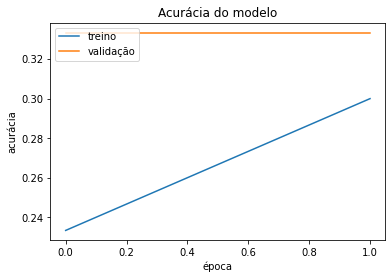

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Acurácia do modelo")
plt.ylabel("acurácia")
plt.xlabel("época")
plt.legend(["treino", "validação"], loc="upper left")
plt.show()

#### Avaliação do melhor modelo no conjunto de teste

In [15]:
# evaluate the best model
loss, acc = model.evaluate(x=test_generator, verbose=True)
print("Loss: {0} / Acc: {1}".format(loss, acc))

4/4 [==============================] - 6s 1s/step - loss: 1.7278 - accuracy: 0.3333
Loss: 1.727807641029358 / Acc: 0.3333333432674408


In [16]:
import numpy as np

predictions = model.predict(x=test_generator)
preds = []
for prediction in predictions:
    indx = np.argmax(prediction)
    preds.append([indx])

#### Geração do relatório de classificação e da matrix de confusão 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns

report = classification_report(
    test_generator.classes, preds,
    target_names=test_generator.class_indices.keys(),
    output_dict=True)

report_df = pd.DataFrame(report).transpose()
report_df

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score,support
angular_leaf_spot,0.333333,1.000000,0.500000,10.000000
bean_rust,0.000000,0.000000,0.000000,10.000000
healthy,0.000000,0.000000,0.000000,10.000000
accuracy,0.333333,0.333333,0.333333,0.333333
macro avg,0.111111,0.333333,0.166667,30.000000
weighted avg,0.111111,0.333333,0.166667,30.000000


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


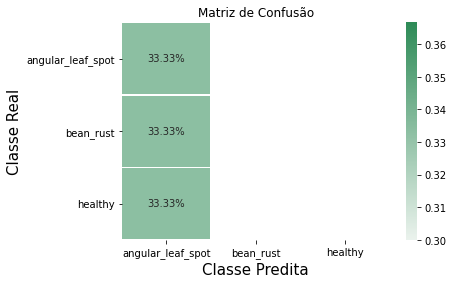

In [19]:
confusion_mtx = confusion_matrix(test_generator.classes, preds)
ticklabels = test_generator.class_indices.keys()
ax = plt.axes()
sns.heatmap((confusion_mtx/sum(confusion_mtx)), annot=True,
            xticklabels=ticklabels, 
            yticklabels=ticklabels,
            fmt='.02%',
            cmap=sns.light_palette("seagreen", as_cmap=True),
            linewidths=0.2, ax = ax)

ax.set_title('Matriz de Confusão')
plt.xlabel('Classe Predita', fontsize = 15)
plt.ylabel('Classe Real', fontsize = 15)
plt.show()

## Salva métricas
Utiliza a função `save_metrics` do [SDK da PlatIAgro](https://platiagro.github.io/sdk/) para salvar métricas. Por exemplo: `accuracy`, `precision`, `r2_score`, `custom_score` etc.<br>

In [20]:
mlflow.log_metric("classification_report", report_df)

## Salva resultados da tarefa

A plataforma guarda o conteúdo de `/tmp/data/` para as tarefas subsequentes.<br>
Use essa pasta para salvar modelos, metadados e outros resultados.

In [21]:
from joblib import dump

artifacts = {
    "model_path": model_path,
    "class_names": test_generator.classes,
}
dump(artifacts, "/tmp/data/model.joblib")

['/tmp/data/model.joblib']